In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.impute import SimpleImputer # import simple imputer
from math import sqrt
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score


In [3]:
filepath = '../Data/final/Monaragala_demand.csv'
data = pd.read_csv(filepath, index_col="Month",parse_dates=["Month"])
print(data.shape) 
data.head()

(84, 7)


,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-01-01,6.573055,26.7,30.4,22.9,7.0,67.0,70.0
2015-02-01,6.286862,26.7,30.3,23.0,209.8,71.0,77.0
2015-03-01,6.635457,27.7,31.7,23.7,106.2,68.0,77.0
2015-04-01,7.246675,29.0,33.0,24.9,31.5,74.0,79.0
2015-05-01,7.227581,29.8,34.3,25.4,148.5,70.0,71.0


In [4]:
data.describe(include='all')

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
count,84.000000,84.000000,84.000000,84.000000,84.000000,82.000000,5.000000
mean,9.480147,28.677381,32.610714,24.732143,113.183333,67.878049,74.800000
std,1.869647,1.338436,1.764033,1.017576,112.765097,6.431770,4.024922
min,1.393023,26.000000,29.500000,22.200000,0.000000,57.000000,70.000000
25%,8.478729,27.525000,30.900000,24.000000,26.700000,63.250000,71.000000
50%,9.658475,29.050000,33.000000,25.100000,69.500000,68.000000,77.000000
75%,10.730466,29.800000,34.100000,25.425000,193.375000,71.750000,77.000000
max,15.496506,30.900000,35.800000,26.800000,399.900000,81.000000,79.000000


In [5]:
data.isnull().sum() #return true/ false. If ture , its a missing place. If false, it contains a values.

Demand            0
Temp_Avg          0
Temp_Max          0
Temp_Min          0
Rainfall_Avg      0
HumidityDay       2
HumidityNight    79
dtype: int64

In [6]:
sample_data= data.copy()
sample_data.isnull().sum()

Demand            0
Temp_Avg          0
Temp_Max          0
Temp_Min          0
Rainfall_Avg      0
HumidityDay       2
HumidityNight    79
dtype: int64

In [7]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
# sample_data.Rainfall_Avg = imputer.fit_transform(sample_data['Rainfall_Avg'].values.reshape(-1,1))[:,0]
sample_data.HumidityDay = imputer.fit_transform(sample_data['HumidityDay'].values.reshape(-1,1))[:,0]
# sample_data.HumidityNight = imputer.fit_transform(sample_data['HumidityNight'].values.reshape(-1,1))[:,0]
sample_data= sample_data.drop(columns='HumidityNight')
sample_data.isnull().sum()

Demand          0
Temp_Avg        0
Temp_Max        0
Temp_Min        0
Rainfall_Avg    0
HumidityDay     0
dtype: int64

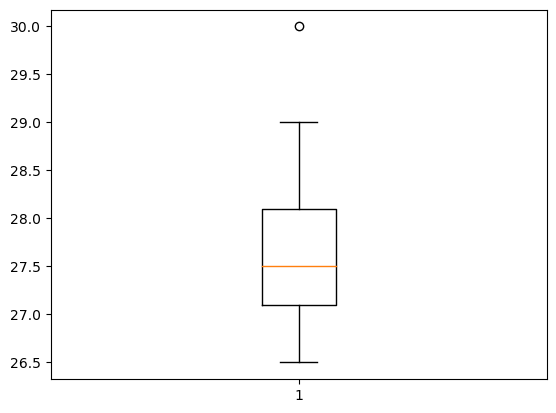

In [9]:
plt.boxplot(sample_data["Temp_Avg"])  #finding outliers
plt.show()

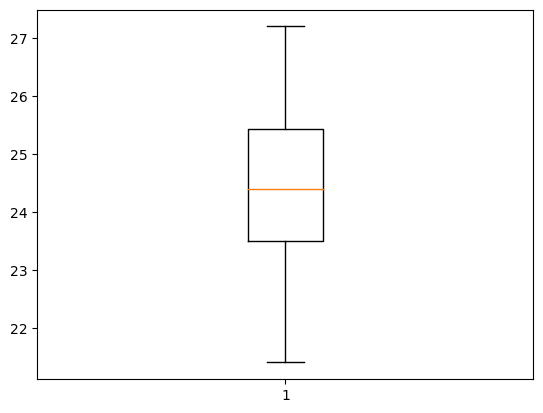

In [13]:
plt.boxplot(sample_data["Temp_Min"])  #finding outliers
plt.show()

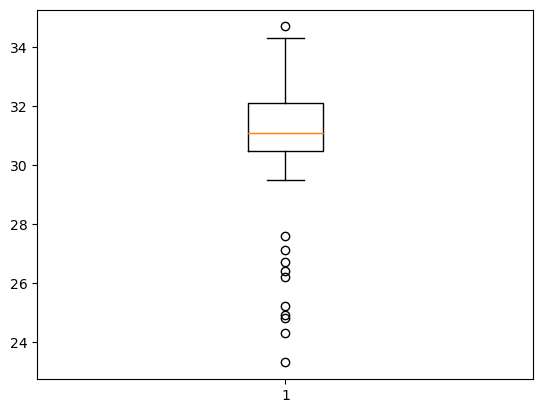

In [14]:
plt.boxplot(sample_data["Temp_Max"])  #finding outliers
plt.show()

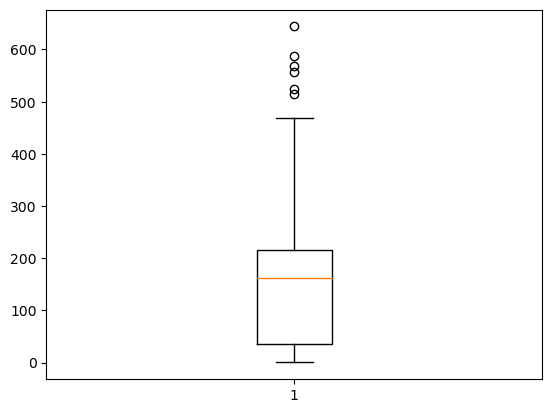

In [15]:
plt.boxplot(sample_data["Rainfall_Avg"])  #finding outliers
plt.show()

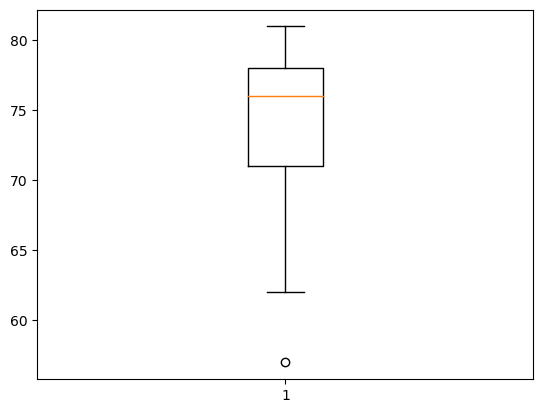

In [16]:
plt.boxplot(sample_data["HumidityDay"])  #finding outliers
plt.show()

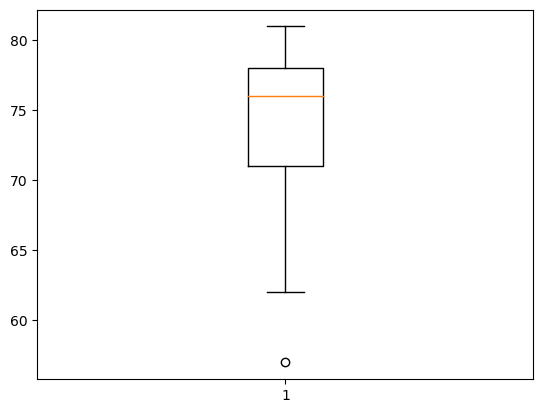

In [17]:
plt.boxplot(sample_data["HumidityNight"])  #finding outliers
plt.show()

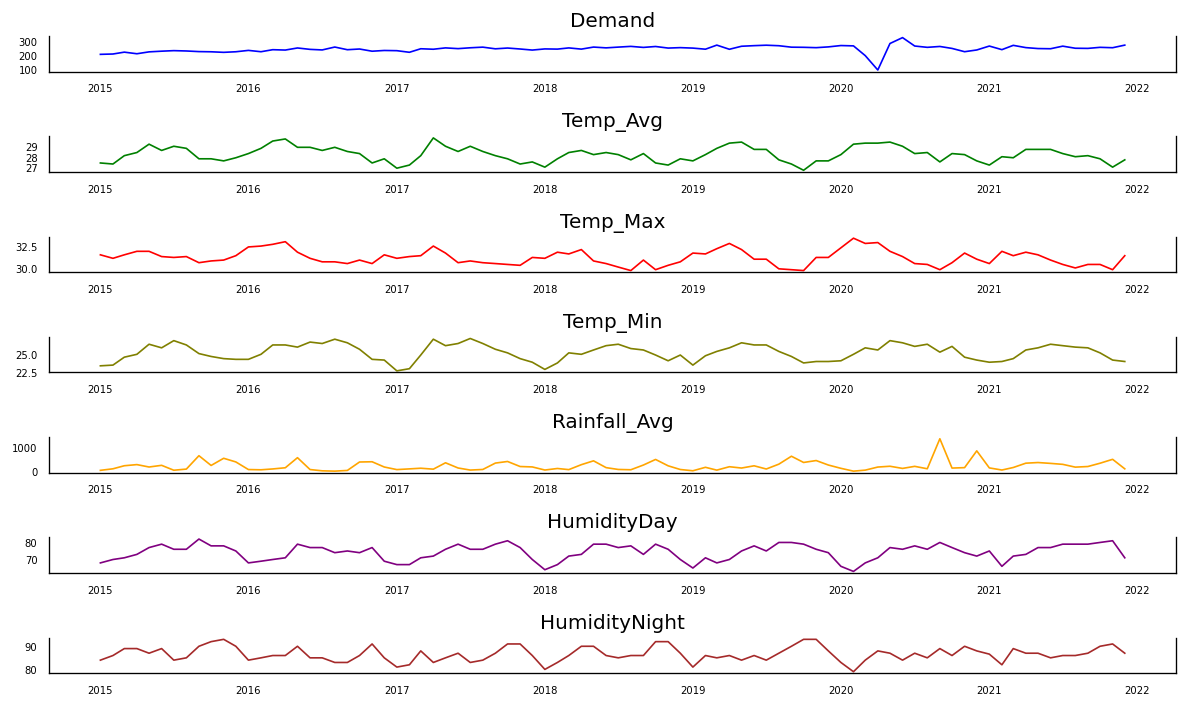

In [14]:
color_list=["blue","green","red","olive","orange","purple","brown"]

fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = sample_data[sample_data.columns[i]]
    ax.plot(data, color=color_list[i%(len(color_list))], linewidth=1)
    
    ax.set_title(sample_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [9]:
#check weather data stationary or not(augmented dickey-fuller test)

ad_fuller_result_1 = adfuller(sample_data['Demand'])#.diff()[1:])

print('Demand')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Avg'])#.diff()[1:])

print('Average Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Max'])#.diff()[1:])

print('Maximum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Min'])#.diff()[1:])

print('Minimum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Rainfall_Avg'])#.diff()[1:])

print('Average Rainfall')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityDay'])#.diff()[1:])

print('Humidity Day')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

# ad_fuller_result_2 = adfuller(sample_data['HumidityNight'])#.diff()[1:])

# print('Humidity Night')
# print(f'ADF Statistic: {ad_fuller_result_2[0]}')
# print(f'p-value: {ad_fuller_result_2[1]}')

# p value shold be , p <0.05

Demand
ADF Statistic: -2.2599264593426387
p-value: 0.1852182613198215

---------------------

Average Temperature
ADF Statistic: -8.109489585612087
p-value: 1.236864871387155e-12

---------------------

Maximum Temperature
ADF Statistic: -1.905620621035798
p-value: 0.329421630622574

---------------------

Minimum Temperature
ADF Statistic: -2.2808554095240616
p-value: 0.17821683983424075

---------------------

Average Rainfall
ADF Statistic: -5.628313840715865
p-value: 1.1042551457628838e-06

---------------------

Humidity Day
ADF Statistic: -1.5092572746488957
p-value: 0.5289270281935566

---------------------



In [ ]:
# do first order differencing

ad_fuller_result_1= adfuller(sample_data['Demand'].diff()[1:])

print('Demand')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Avg'].diff()[1:])

print('Average Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Max'].diff()[1:])

print('Maximum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Temp_Min'].diff()[1:])

print('Minimum Temperature')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['Rainfall_Avg'].diff()[1:])

print('Average Rainfall')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityDay'].diff()[1:])

print('Humidity Day')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(sample_data['HumidityNight'].diff()[1:])

print('Humidity Night')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')


In [11]:
sample_data.head(5)

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay
Month,,,,,,
2015-01-01,21.019726,26.6,32.1,21.1,5.9,62.0
2015-02-01,20.906431,27.1,32.8,21.4,33.9,63.0
2015-03-01,20.591265,28.5,34.5,22.5,207.2,61.0
2015-04-01,21.613543,28.2,33.3,23.2,367.5,73.0
2015-05-01,21.594135,28.7,32.8,24.6,69.7,75.0


In [12]:
# make first-order differencing 
df_transformed = sample_data.diff().dropna()
df = sample_data.iloc[1:]
print(df.shape)
df_transformed.shape
df_transformed.head()

(83, 6)


,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay
Month,,,,,,
2015-02-01,-0.286193,0.0,-0.1,0.1,202.8,4.0
2015-03-01,0.348595,1.0,1.4,0.7,-103.6,-3.0
2015-04-01,0.611218,1.3,1.3,1.2,-74.7,6.0
2015-05-01,-0.019094,0.8,1.3,0.5,117.0,-4.0
2015-06-01,0.059718,0.3,0.4,0.1,-94.9,-4.0


In [13]:
#Test the Granger Causality

max_lags=6
y='Demand'

for i in range(len(df_transformed.columns)-1):
    results=grangercausalitytests(df_transformed[[y,df_transformed.columns[i+1]]],max_lags,verbose=False)
    p_values=[round(results[i+1][0]['ssr_ftest'][1],4)for i in range(max_lags)]
    print('column-{} :P_values - {}'.format(df_transformed.columns[i+1],p_values))

column-Temp_Avg :P_values - [0.129, 0.0147, 0.0109, 0.0065, 0.0032, 0.0037]
column-Temp_Max :P_values - [0.4458, 0.0171, 0.0069, 0.0048, 0.003, 0.0031]
column-Temp_Min :P_values - [0.0363, 0.0438, 0.0196, 0.0128, 0.0115, 0.0098]
column-Rainfall_Avg :P_values - [0.9173, 0.5748, 0.3845, 0.1736, 0.0846, 0.0305]
column-HumidityDay :P_values - [0.209, 0.8257, 0.7097, 0.4909, 0.4961, 0.1708]


In [20]:
df_input=sample_data[['Demand','Temp_Avg','HumidityDay']]

In [21]:
df_input

,Demand,Temp_Avg,HumidityDay
Month,,,
2015-01-01,204.912437,27.4,68
2015-02-01,207.434038,27.3,70
2015-03-01,221.135535,28.1,71
2015-04-01,209.350172,28.4,73
2015-05-01,223.190953,29.2,77
...,...,...,...
2021-08-01,249.853952,28.0,79
2021-09-01,248.756453,28.1,79
2021-10-01,256.566377,27.8,80


In [22]:
df_train=df_input[:-12]
df_test=df_input[-12:]

In [23]:
df_train.shape

(72, 3)

In [24]:
df_test.shape

(12, 3)

In [25]:
model = VAR(df_train.diff()[1:])

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
sorted_order=model.select_order(maxlags=16)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.737      8.846*       6227.       8.779
1        8.850       9.288       6979.       9.019
2        8.608       9.374       5496.       8.904
3        8.552       9.647       5241.       8.975
4        8.624       10.05       5717.       9.174
5        8.600       10.35       5721.       9.277
6        8.438       10.52       5049.       9.242
7        8.447       10.86       5371.       9.378
8        8.157       10.89       4323.       9.215
9        7.923       10.99       3780.       9.108
10       7.699       11.09       3451.       9.012
11       7.562       11.29       3589.       9.002
12       6.998       11.05       2581.       8.565
13       7.123       11.50       4011.       8.817
14       6.976       11.68       5352.       8.797
15       6.726       11.76       7796.       8.674
16      3.815*       9.180     

In [31]:
var_model = VARMAX(df_train, order=(16,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     Statespace Model Results                                    
Dep. Variable:     ['Demand', 'Temp_Avg', 'HumidityDay']   No. Observations:                   72
Model:                                           VAR(16)   Log Likelihood                -564.118
                                             + intercept   AIC                           1434.235
Date:                                   Thu, 23 Feb 2023   BIC                           1782.565
Time:                                           02:21:28   HQIC                          1572.906
Sample:                                       01-01-2015                                         
                                            - 12-01-2020                                         
Covariance Type:                                     opg                                         
Ljung-Box (L1) (Q):     3.20, 20.41, 15.16   Jarque-Bera (JB):   986.86, 1.06, 4.37
Prob(Q):                  0.07, 0.

In [32]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)
predictions=predict.predicted_mean

In [33]:
predictions.columns=['Demand_predicted','Temp_Avg_predicted','HumidityDay_predicted']
predictions

,Demand_predicted,Temp_Avg_predicted,HumidityDay_predicted
2021-01-01,244.924108,27.822130,69.014703
2021-02-01,237.408605,28.283346,67.547916
2021-03-01,229.645830,28.458924,68.233431
2021-04-01,229.487644,28.813994,70.855136
2021-05-01,247.300785,28.983776,74.842410
2021-06-01,247.327518,28.932808,76.491180
2021-07-01,246.599716,28.674299,77.487839
2021-08-01,257.781096,28.441985,78.317671
2021-09-01,255.884466,28.247602,77.953202
2021-10-01,249.228220,28.266344,77.393462


In [34]:
test_vs_pred=pd.concat([df_test,predictions],axis=1)
test_vs_pred

,Demand,Temp_Avg,HumidityDay,Demand_predicted,Temp_Avg_predicted,HumidityDay_predicted
2021-01-01,265.939509,27.2,75,244.924108,27.822130,69.014703
2021-02-01,239.516820,28.0,66,237.408605,28.283346,67.547916
2021-03-01,271.199958,27.9,72,229.645830,28.458924,68.233431
2021-04-01,254.523678,28.7,73,229.487644,28.813994,70.855136
2021-05-01,247.569837,28.7,77,247.300785,28.983776,74.842410
2021-06-01,246.221979,28.7,77,247.327518,28.932808,76.491180
2021-07-01,265.260417,28.3,79,246.599716,28.674299,77.487839
2021-08-01,249.853952,28.0,79,257.781096,28.441985,78.317671
2021-09-01,248.756453,28.1,79,255.884466,28.247602,77.953202
2021-10-01,256.566377,27.8,80,249.228220,28.266344,77.393462


<AxesSubplot:>

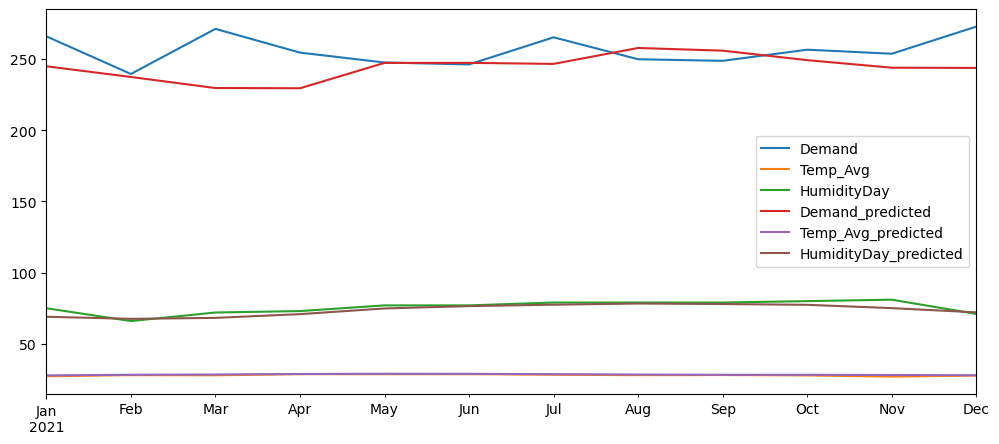

In [35]:
test_vs_pred.plot(figsize=(12,5))

In [40]:
Mean_Square_Error=mean_squared_error(df_test,predictions,multioutput='raw_values')
print(Mean_Square_Error)

[3.54700910e+02 2.30291268e-01 9.06746044e+00]


In [46]:
Root_Mean_Square_Error=sqrt(mean_squared_error(df_test,predictions))
print(Root_Mean_Square_Error)

11.015120849835036


In [48]:
Mean_Absolute_Error=mean_absolute_error(df_test,predictions)
print(Mean_Absolute_Error)

5.689111030845804


In [49]:
R2_Error=r2_score(df_test,predictions,multioutput='variance_weighted')
print(R2_Error)

-1.9960581632215668
